In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## The Softmax Activation Function
In our case, we’re looking to get this model to be a classifier, so we want an activation function
meant for classification. One of these is the Softmax activation function. First, why are we
bothering with another activation function? It just depends on what our overall goals are. In this
case, the rectified linear unit is unbounded, not normalized with other units, and exclusive. “Not
normalized” implies the values can be anything, an output of ​ [12, 99, 318] ​ is without context, and
“exclusive” means each output is independent of the others. To address this lack of context, the
softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and
produce a normalized distribution of probabilities for our classes. In the case of classification,
what we want to see is a prediction of which class the network “thinks” the input represents. This
distribution returned by the softmax activation function represents ​ confidence scores​ for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score. Still, we can also note the other confidence scores in our overarching
algorithm/program that uses this network. For example, if our network has a confidence
distribution for two classes: ​ [0.45, 0.55] , ​ the prediction is the 2nd class, but the confidence in this
prediction isn’t very high. Maybe our program would not act in this case since it’s not very
confident.
Here’s the function for the ​ Softmax​ :
    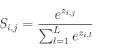
    
That might look daunting, but we can break it down into simple pieces and express it in Python
code, which you may find is more approachable than the formula above. To start, here are
example outputs from a neural network layer:
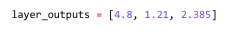

The first step for us is to “exponentiate” the outputs. We do this with Euler’s number, ​ e, ​ which is
roughly ​ 2.71828182846 ​ and referred to as the “exponential growth” number. Exponentiating is
taking this constant to the power of the given parameter:

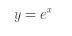
Both the numerator and the denominator of the Softmax function contain ​ e ​ raised to the power of
z ​ , where ​ z ​ , given indices, means a singular output value — the index ​ i ​ means the current sample
and the index ​ j ​ means the current output in this sample. The numerator exponentiates the current
output value and the denominator takes a sum of all of the exponentiated outputs for a given
sample. We need then to calculate these exponentiates to continue:

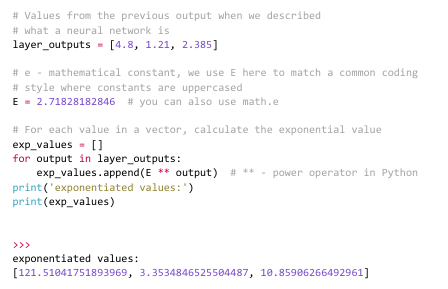
Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative
values. Imagine the output as ​ [ ​ 4.8​ , ​ 1.21​ , -​ 2.385​ ] ​ — even after normalization, the last
value will still be negative since we’ll just divide all of them by their sum. A negative probability
(or confidence) does not make much sense. An exponential value of any number is always
non-negative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive
values:
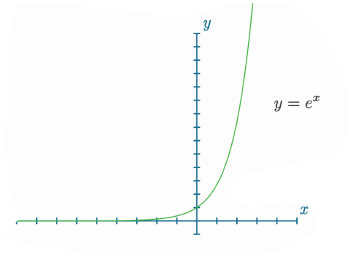
Figure 38: Graph of an exponential function.

The exponential function is a monotonic function. This means that, with higher input values,
outputs are also higher, so we won’t change the predicted class after applying it while making
sure that we get non-negative values. It also adds stability to the result as the normalized
exponentiation is more about the difference between numbers than their magnitudes. Once we’ve
exponentiated, we want to convert these numbers to a probability distribution (converting the
values into the vector of confidences, one for each class, which add up to 1 for everything in the
vector). What that means is that we’re about to perform a normalization where we take a given
value and divide it by the sum of all of the values. For our outputs, exponentiated at this stage,
that’s what the equation of the Softmax function describes next — to take a given exponentiated
value and divide it by the sum of all of the exponentiated values. Since each output value
normalizes to a fraction of the sum, all of the values are now in the range of 0 to 1 and add up to 1
— they share the probability of 1 between themselves. Let’s add the sum and normalization to the
code:
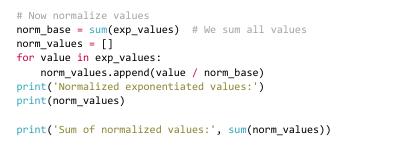

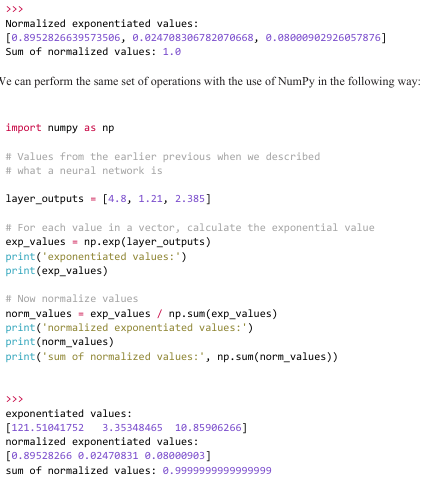
